## <font color='aqua'> Time for Last Journey Bispectra Stuff! </font>

To compute the bispectrum for Last Journey, we have the following equation for the binned bispectrum estimator (excluding polarization factors because we're dealing with a scalar temperature field):

$$ B_{\ell_1\ell_2\ell_3} = \sqrt{N_{\Delta}^{\ell_1\ell_2\ell_3}} \sum_{m_1,m_2,m_3} \begin{pmatrix}
    \ell_1 & \ell_2 & \ell_3 \\
    m_1 & m_2 & m_3
\end{pmatrix} \langle a_{\ell_1 m_1} a_{\ell_2 m_2} a_{\ell_3 m_3} \rangle $$

such that:

$$ N_{\Delta}^{\ell_1\ell_2\ell_3} = \frac{(2\ell_1+1)(2\ell_2+1)(2\ell_3+1)}{4\pi} \begin{pmatrix}
    \ell_1 & \ell_2 & \ell_3 \\
    0 & 0 & 0
\end{pmatrix}^2

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import healpy as hp
import pickle
import numba as nb
import spherical
import numba_progress

# import cmblensplus
# from cmblensplus import curvedsky

from tqdm.notebook import tqdm
from spherical import Wigner3j
from numba import jit, njit, prange, set_num_threads
from numba_progress import ProgressBar

from helper_funcs import *

In [2]:
sorted_alms_pickle_in = open("lj_sorted_alms.pickle","rb")
sorted_alms = pickle.load(sorted_alms_pickle_in)

In [11]:
l1, l2, l3 = 512, 512, 512

with ProgressBar(total=(2*l1+1)) as progress_proxy:
    bispec_jit = compute_bispec_jit_test(l1, l2, l3, sorted_alms[l1], sorted_alms[l2], sorted_alms[l3], progress_proxy, num_threads=48)

print("B_({},{},{}) = {:.4e}".format(l1, l2, l3, bispec_jit))

  0%|          | 0/1025 [00:00<?, ?it/s]

B_(512,512,512) = 1.3640e-04


In [13]:
# l1_test, l2_test, l3_test = 1000, 1000, 1000

# # spherical
# w3j = Wigner3j(l1_test, l2_test, l3_test, 0, 0, 0)
# print("direct spherical w3j:",w3j)

# # # pywigxjpf
# # wig.wig_table_init(2*max(l1_test, l2_test, l3_test), 3)
# # wig.wig_temp_init(2*max(l1_test, l2_test, l3_test))

# # jpf_w3j = get_w3j(l1_test, l2_test, l3_test, 0, 0, 0)
# # print("jpf w3j:", jpf_w3j)

# # # # sympy
# # s_w3j = wigner_3j(l1_test, l2_test, l3_test, 0, 0, 0)
# # print("sympy w3j:",float(s_w3j))

# # spherical
# # calc3j = spherical.Wigner3jCalculator(l2_test, l3_test)
# # w3j = calc3j.calculate(l2_test, l3_test, 0, 0)
# # print("object spherical w3j:")
# # for w in w3j:
# #     print(w)

In [15]:
# equilateral case

lmax = 512

Bls = bispec_range(lmax, sorted_alms, scheme='e', num_threads=16)

Looping over even equilateral ell-triplets:   0%|          | 0/256 [00:00<?, ?it/s]

In [29]:
def plot_bispec_eq(bispec, figsize=(12, 6), xscale='log', yscale='log', ylim=[1e-8,1e-3], xlabel="even multipole triplet $(\ell_1, \ell_2, \ell_3)$", ylabel="$B_{(\ell_1, \ell_2, \ell_3)}$", title="Bispectrum"):
    plt.figure(figsize=figsize)
    sorted_bispec = sorted(bispec.items()) # sorted by key, return a list of tuples
    ell_triplets, bispec_val = zip(*sorted_bispec) # unpack a list of pairs into two tuples
    plt.plot(ell_triplets, bispec_val)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.ylim(ylim)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.title(title, fontsize=18)
    if xscale == 'linear':
        x_points_lin = [0, 100, 200, 300, 400, 500]
        x_labels_lin = ['(0,0,0)', '(100,100,100)', '(200,200,200)', '(300,300,300)', '(400,400,400)', '(500,500,500)']
        plt.xticks(x_points_lin, x_labels_lin, fontsize=12)
    elif xscale == 'log':
        x_points_log = [1e1, 1e2]
        x_labels_log = ['$(10^1,10^1,10^1)$', '$(10^2,10^2,10^2)$']
        plt.xticks(x_points_log, x_labels_log, fontsize=14)
    else:
        plt.xticks(fontsize=14)
    plt.yticks(fontsize=18)

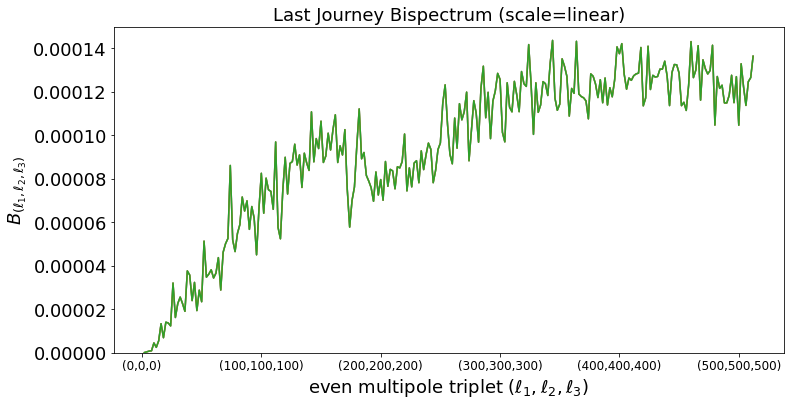

In [30]:
plot_bispec_eq(Bls, xscale='linear', yscale='linear', ylim=[0, 0.00015], title="Last Journey Bispectrum (scale=linear)")

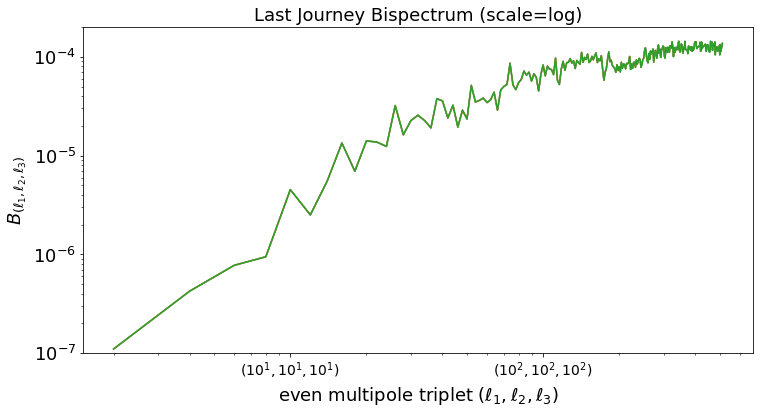

In [31]:
plot_bispec_eq(Bls, ylim=[1e-7, 2e-4], title="Last Journey Bispectrum (scale=log)")

Next Steps/Notes:

- Take a look at other papers that plot bispectrum to see what those look like / get an idea
     - Planck papers have some stuff on this
        - Non-Gaussianity one in earlier releases can help give visual sense of various triangle shapes and what gravitationally-induced non-Gaussianities look like
        - NOTE: Higher z but still gives good sense
- Think about what finite thin shell equiv of power spectrum would be for bispectrum
- Look into Gravitationally-induced non-Gaussianity (Perturbation Theory)
    - Bernardo 300-page doc +- something something 100 --> ask Xiaofeng and Aurora (triangle shapes)